<a href="https://colab.research.google.com/github/immischein/ML-bandgap/blob/main/create_balanced_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns

### Load Dataset from file

In [3]:
# load from google drive file
# dataset contains around 82998 materials and 81 features
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Project Documents ML-CMT/bandgap_dataset_premium_2.csv')

Mounted at /content/drive


### Remove unnecessary data

In [4]:
# we don't use this column anywhere
df = df.drop(columns="formula")

In [18]:
# remove metals
df = df[df["band_gap"] > 0]

## Initial Dataset

### Descriptive Analytics

In [19]:
print(f"Dataset size is {df.shape}")
df.info()
df.describe()

Dataset size is (81998, 80)
<class 'pandas.core.frame.DataFrame'>
Index: 81998 entries, 0 to 81997
Data columns (total 80 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   material_id                       81998 non-null  object 
 1   band_gap                          81998 non-null  float64
 2   density                           81998 non-null  float64
 3   volume                            81998 non-null  float64
 4   a                                 81998 non-null  float64
 5   b                                 81998 non-null  float64
 6   c                                 81998 non-null  float64
 7   alpha                             81998 non-null  float64
 8   beta                              81998 non-null  float64
 9   gamma                             81998 non-null  float64
 10  n_atoms                           81998 non-null  int64  
 11  mean_distance                     81998 non-

,band_gap,density,volume,a,b,c,alpha,beta,gamma,n_atoms,...,atomic_radius_range,std_atomic_radius,max_atomic_radius,min_atomic_radius,avg_boiling_point,boiling_point_range,std_boiling_point,max_boiling_point,min_boiling_point,number_of_elements
count,81998.000000,81998.000000,81998.000000,81998.000000,81998.000000,81998.000000,81998.000000,81998.000000,81998.000000,81998.000000,...,81827.000000,81827.000000,81827.000000,81827.000000,81942.000000,81942.000000,81942.000000,81942.00000,81942.000000,81998.000000
mean,2.008621,4.033431,672.461985,7.684102,8.062514,11.301802,86.022149,88.083887,89.751261,42.681004,...,4.198348,1.517300,4.590206,0.391857,2610.680019,6229.912318,2201.268193,6392.81597,162.903652,3.803568
std,1.554917,1.674945,694.552196,3.176485,2.790923,6.802653,17.335792,15.883331,22.025312,40.714649,...,1.362272,0.512716,1.398939,0.127667,936.129643,2792.453291,972.703270,2796.79519,217.813947,0.982543
min,0.001000,0.020144,11.286588,2.363000,2.363000,2.395898,5.200300,5.397478,5.397478,1.000000,...,0.250000,0.100000,0.250000,0.000000,3.376000,4.220000,1.688000,4.22000,0.000000,1.000000
25%,0.688100,2.909166,257.364387,5.564078,6.028705,7.420564,77.817055,88.983131,87.252454,16.000000,...,3.223322,1.158767,3.600000,0.320000,2024.363965,4215.100000,1510.957487,4399.07000,85.030000,3.000000
50%,1.754650,3.756501,456.001697,7.028730,7.739968,9.731572,90.000000,90.000000,90.000000,30.000000,...,4.133032,1.480618,4.500000,0.389444,2567.453691,5845.000000,2062.942347,5991.05500,90.200000,4.000000
75%,3.031600,4.921850,845.734409,8.975985,9.344012,13.179710,90.000000,90.000000,99.687205,54.000000,...,4.961986,1.800987,5.400000,0.494975,3211.485000,8032.000000,2813.543729,8195.00000,90.200000,4.000000
max,17.891400,16.321559,20090.906408,46.210701,56.617301,211.425839,169.783994,169.783994,168.048246,444.000000,...,10.912723,4.122814,11.350000,0.800000,6712.732682,18763.000000,6673.998492,18853.20000,1712.500000,9.000000


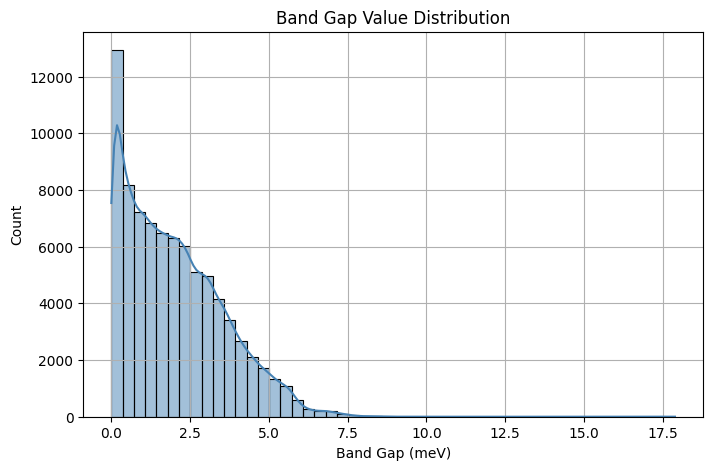

In [23]:
plt.figure(figsize=(8, 5))
sns.histplot(df["band_gap"], kde=True, bins=50, color="steelblue")
plt.title("Band Gap Value Distribution")
plt.xlabel("Band Gap (meV)")
plt.ylabel("Count")
plt.grid(True)
plt.show()

In [24]:
quantiles = df["band_gap"].quantile([0.1, 0.2, 0.3, 0.5, 0.7, 0.9])
print(quantiles)

0.1    0.18197
0.2    0.50824
0.3    0.89200
0.5    1.75465
0.7    2.73818
0.9    4.21536
Name: band_gap, dtype: float64


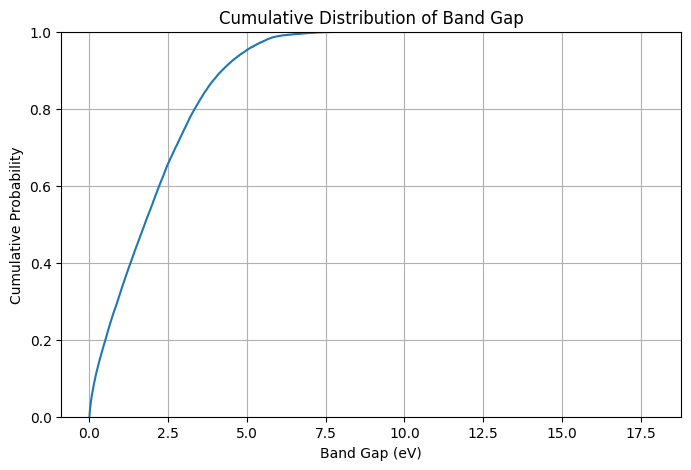

In [25]:
plt.figure(figsize=(8, 5))
sns.ecdfplot(df["band_gap"])
plt.title("Cumulative Distribution of Band Gap")
plt.xlabel("Band Gap (eV)")
plt.ylabel("Cumulative Probability")
plt.grid(True)
plt.show()

## Processed (Donwsampled) Dataset

In [41]:
# downsample overrepresented region of low band gap values
cutoff = 1.75
downsample_frac = 0.5

# Split low and high band gap regions
low_gap_df = df[df["band_gap"] <= cutoff]
high_gap_df = df[df["band_gap"] > cutoff]

# Separate low-gap into rows without and with missing values
low_gap_without_na = low_gap_df[~low_gap_df.isnull().any(axis=1)]
low_gap_with_na = low_gap_df[low_gap_df.isnull().any(axis=1)]

# Number of rows to keep
n_keep = int(len(low_gap_df) * downsample_frac)

# Sample from clean rows first
n_clean = len(low_gap_without_na)
n_clean_sample = min(n_keep, n_clean)

sampled_without_na = low_gap_without_na.sample(n=n_clean_sample, random_state=42)

# If more are needed, sample the rest from rows with missing values
remaining_needed = n_keep - n_clean_sample

if remaining_needed > 0:
    sampled_with_na = low_gap_with_na.sample(n=remaining_needed, random_state=42)
else:
    sampled_with_na = pd.DataFrame(columns=low_gap_df.columns)  # empty placeholder

# Concatenate sampled low-gap data
low_gap_downsampled = pd.concat([sampled_without_na, sampled_with_na])

# Concatenate with all high-gap data
df_balanced = pd.concat([low_gap_downsampled, high_gap_df])

<ipython-input-41-9b313e81a7a9>:31: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  low_gap_downsampled = pd.concat([sampled_without_na, sampled_with_na])


In [42]:
print("Balanced dataset shape:", df_balanced.shape)
print("Missing values (any):", df_balanced.isnull().any(axis=1).sum())

Balanced dataset shape: (61540, 80)
Missing values (any): 169


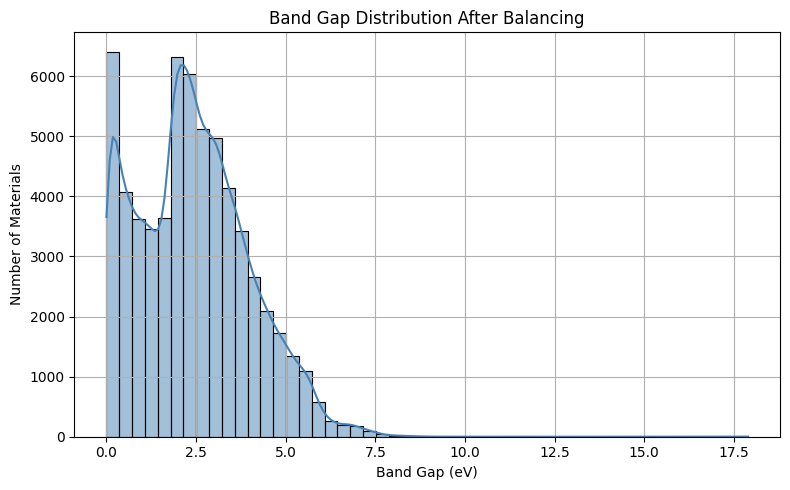

In [44]:
plt.figure(figsize=(8, 5))
sns.histplot(df_balanced["band_gap"], bins=50, kde=True, color="steelblue", edgecolor="black")
plt.title("Band Gap Distribution After Balancing")
plt.xlabel("Band Gap (eV)")
plt.ylabel("Number of Materials")
plt.grid(True)
plt.tight_layout()
plt.show()

In [45]:
# save dataset to Google Drive
save_path = '/content/drive/MyDrive/Project Documents ML-CMT/bandgap_dataset_balanced.csv'

# Save DataFrame
df_balanced.to_csv(save_path, index=False)
print(f"Dataset saved to {save_path}")

Dataset saved to /content/drive/MyDrive/Project Documents ML-CMT/bandgap_dataset_balanced.csv
